In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np
import seaborn as sns

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
Thera_Bank=pd.read_csv(r'C:\Users\AMOL\Downloads\Bank_Personal_Loan_Modelling-1.csv')

In [3]:
Thera_Bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
Thera_Bank.shape

(5000, 14)

In [5]:
Thera_Bank['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [6]:
Thera_Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
Thera_Bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
Thera_Bank=Thera_Bank.drop(['ZIP Code','ID'],axis=1)
#we have to drop Zip code and ID as it is unique.

# To replace negative experience with zero

In [9]:
Thera_Bank[Thera_Bank['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


In [10]:
#Either we can drop negative rows or we can convert negative experience in to zero
#to_drop=Thera_Bank[Thera_Bank['Experience']<0].index
#Thera_Bank=Thera_Bank.drop(to_drop,axis=0)

In [11]:
Thera_Bank['Experience']=Thera_Bank['Experience'].apply(lambda x:0 if x<0 else x)

In [12]:
Thera_Bank[Thera_Bank['Experience']==0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,0,113,4,2.30,3,0,0,0,0,0,1
105,24,0,35,3,0.10,2,0,0,1,0,1,0
151,26,0,132,3,6.50,3,0,1,0,0,0,1
155,24,0,60,4,1.60,1,0,0,0,0,1,0
156,26,0,15,4,0.40,1,0,0,0,0,0,1
160,29,0,134,4,6.50,3,0,1,0,0,0,0
182,24,0,135,1,1.50,1,0,0,0,0,1,0
226,24,0,39,2,1.70,2,0,0,0,0,0,0
256,26,0,99,4,2.30,3,0,0,0,0,0,1
315,24,0,51,3,0.30,3,0,0,0,0,1,0


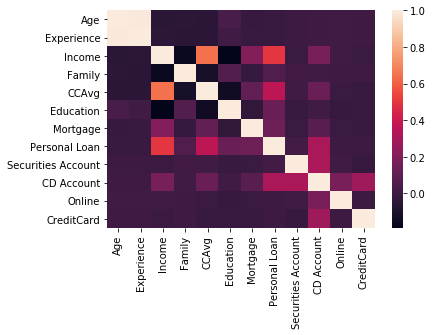

In [13]:
sns.heatmap(Thera_Bank.corr())

As we can see there is a strong coorelation between 'Age' and 'Experience' so we can drop any one of the feature

In [14]:
Thera_Bank=Thera_Bank.drop(['Age'],axis=1)

C:\Users\AMOL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\AMOL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


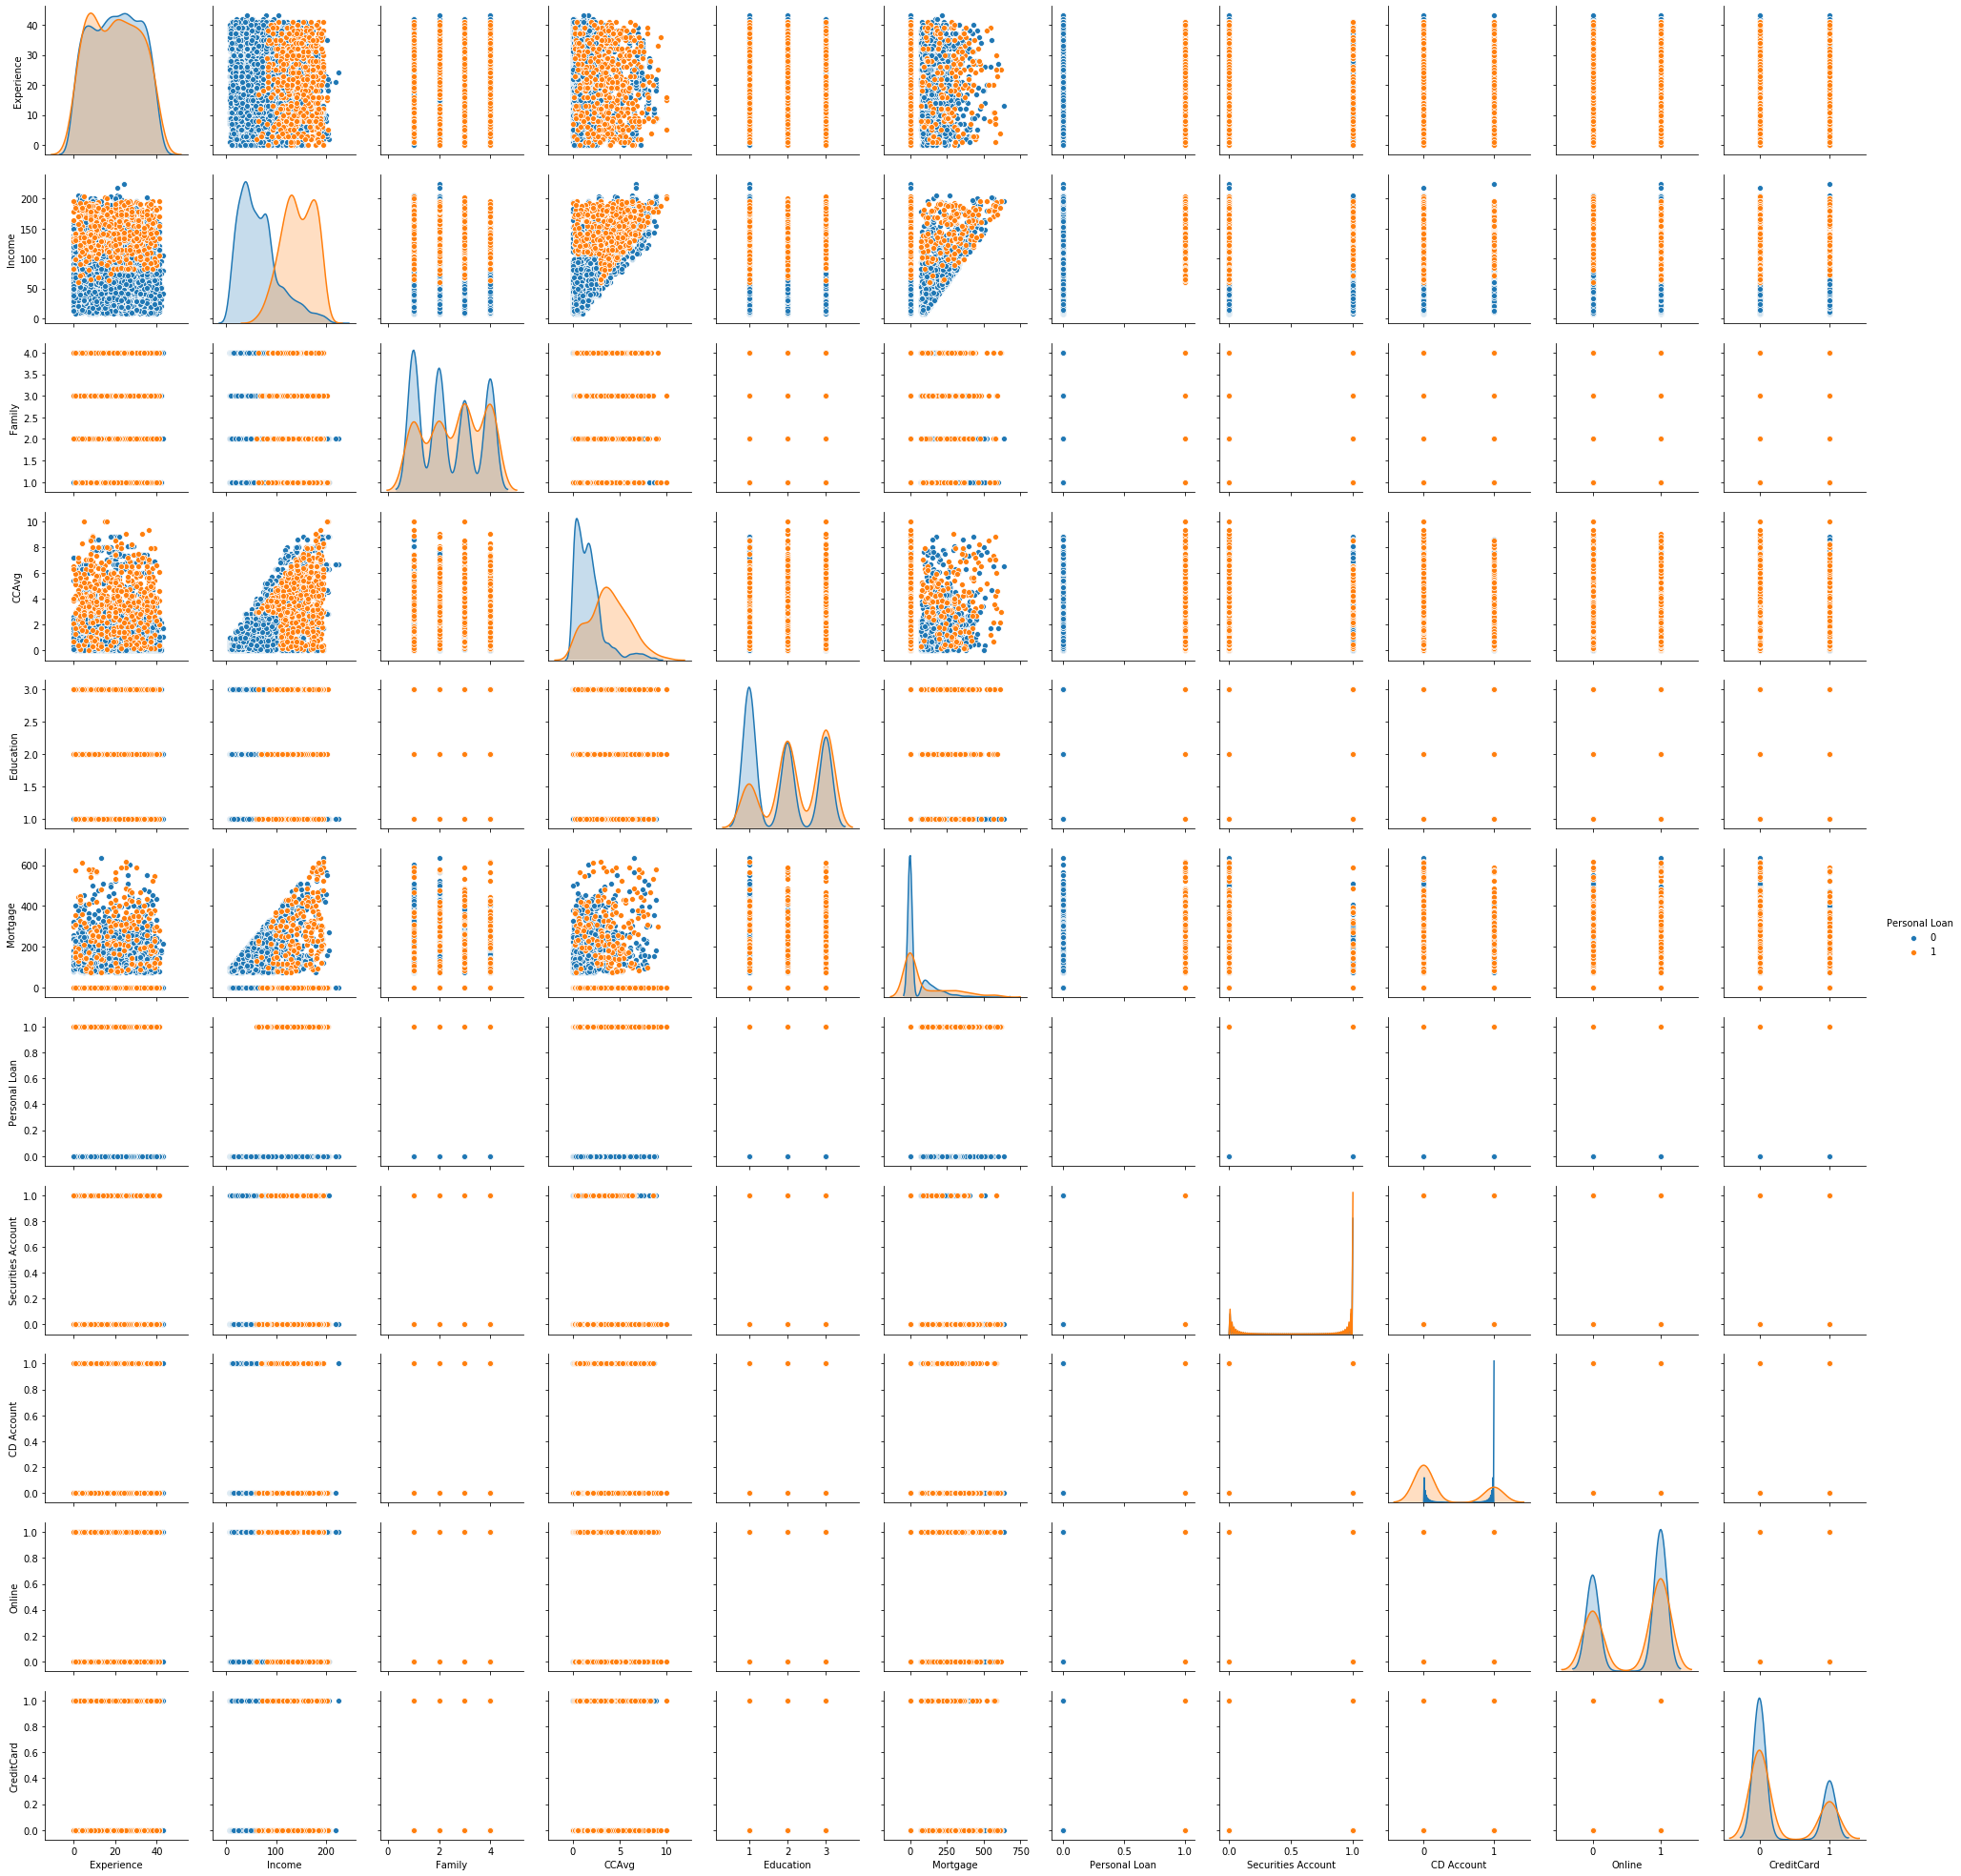

In [15]:
sns.pairplot(Thera_Bank,hue='Personal Loan')

By seeing above pairplot we can say Income is a best feature to predict loan

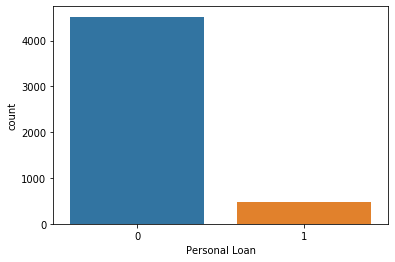

In [16]:
sns.countplot(x='Personal Loan',data=Thera_Bank)

By seeing the above plt we can conclude that while predicting we will get more person who won't take loan

In [17]:
X=Thera_Bank.drop('Personal Loan',axis=1)
y=Thera_Bank['Personal Loan']

In [18]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((3500, 10), (1500, 10), (3500,), (1500,))

In [19]:
ytest.value_counts()

0    1351
1     149
Name: Personal Loan, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)  
Xtest = scaler.transform(Xtest)

# Logistic Regression

In [21]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)
ypredict = model.predict(Xtest)
model_score = model.score(Xtest, ytest)
model_score1=model.score(Xtrain, ytrain)
print('Train Accuracy')
print(model_score1)
print('\n')
print('Test Accuracy')
print(model_score)
print('\n')
print('confusion Matrix')
print(metrics.confusion_matrix(ytest, ypredict))
print('\n')
print('Classification Report')
print(metrics.classification_report(ytest, ypredict))

Train Accuracy
0.9534285714285714


Test Accuracy
0.9486666666666667


confusion Matrix
[[1336   15]
 [  62   87]]


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.85      0.58      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500



C:\Users\AMOL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Naive Bayes

In [22]:
model = GaussianNB()
model.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
y_predict = model.predict(Xtest)

In [24]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix
print('classifiaction Report')
print(classification_report(ytest, y_predict))
print('Confusion Matrix')
print(confusion_matrix(ytest,y_predict))
print('\n')
print('Training Accuracy')
print(model.score(Xtrain,ytrain))
print('\n')
print('Test Accuracy')
print(model.score(Xtest,ytest))


classifiaction Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.48       149

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.88      1500

Confusion Matrix
[[1228  123]
 [  64   85]]


Training Accuracy
0.8894285714285715


Test Accuracy
0.8753333333333333


# KNN 

# To find optimum value of K

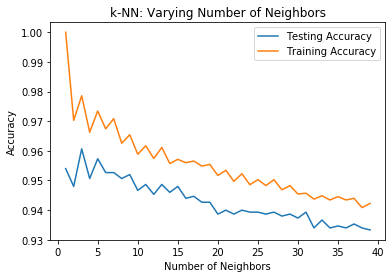

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import numpy as np
neighbors = np.arange(1, 40)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    #Compute accuracy on the training set
    train_accuracy_plot[i] = knn.score(scaledX_train,y_train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = knn.score(scaledX_test,y_test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(Xtrain, ytrain) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [27]:
y_predict=classifier.predict(Xtest)

In [28]:
print('Training Accuracy')
print(model.score(Xtrain,ytrain))
print('\n')
print('Test Accuracy')
print(model.score(Xtest,ytest))
print('\n')
print('confusion matrix')
print(confusion_matrix(ytest,y_predict))
print('\n')
print('classification Report')
print(classification_report(ytest, y_predict))

Training Accuracy
0.8894285714285715


Test Accuracy
0.8753333333333333


confusion matrix
[[1341   10]
 [  49  100]]


classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.91      0.67      0.77       149

    accuracy                           0.96      1500
   macro avg       0.94      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500



# Logistic Regression is best model for this prediction as the training and test accuracy is higher and closer to each other